# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [55]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-10-21 14:16:37--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.3’

car_data.csv.3      100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2024-10-21 14:16:37 (41.9 MB/s) - ‘car_data.csv.3’ saved [58374/58374]



In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [57]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)
# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,713,107,53,108,211,63,11,219,31,25,168,228,704,198,69,10,21,190,203
1,757,91,43,72,142,56,7,149,45,19,140,168,327,165,72,13,23,186,191
2,75,101,53,103,203,63,9,195,34,22,162,210,571,210,68,5,5,191,198
3,495,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
4,701,108,49,103,200,62,10,206,32,23,155,227,635,215,72,6,16,189,198
5,613,92,37,75,191,71,6,161,40,20,128,180,393,135,69,1,14,195,202
6,831,100,47,70,185,70,7,162,40,20,153,179,406,172,68,9,6,200,205
7,214,89,36,72,141,56,7,138,48,18,126,163,286,130,72,1,1,187,192
8,566,108,54,103,212,65,11,208,32,24,162,228,648,240,71,9,0,189,197
9,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203


Methods `describe` and `info` deliver some useful information.

In [52]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.491803,93.542805,44.774135,81.974499,168.553734,61.635701,8.531876,168.593807,40.998179,20.570128,147.712204,188.193078,438.726776,173.965392,72.251366,6.207650,12.936248,188.989071,195.790528
std,245.410453,8.233837,6.378281,15.653038,32.205818,7.016552,4.397389,33.365276,7.796569,2.594404,15.002222,30.817793,177.438017,32.964268,7.022814,4.836436,9.002511,6.110887,7.385984
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,212.000000,87.000000,39.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,135.000000,167.000000,318.000000,147.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,433.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,365.000000,174.000000,71.000000,5.000000,12.000000,189.000000,197.000000
75%,634.000000,100.000000,50.000000,96.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,161.000000,216.000000,586.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,116.000000,59.000000,112.000000,252.000000,126.000000,55.000000,262.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [53]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

1. Судя по результатам X_train_pd.info() все данные количественные, поэтому не нужно их преобразовывать.
2. Нужно проверить данные на наличие пропусков и при необходимости их либо удалить, либо заменить. Пропусков нет.
3. По хорошему нужно посмотреть наличие выбросов - это делается с помощью построения гистограмм для каждого признака.
4. Проверка независимости признаков. **Построила матрицу корреляции, удалила сильно коррелирующие признаки**
5. StandartScaler
6. Можно посмотреть на распределение целевой переменной. - **классы сбалансированы.**

В машинном обучении StandardScaler используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1. Для модели Решающее дерево это необязательный шаг.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64


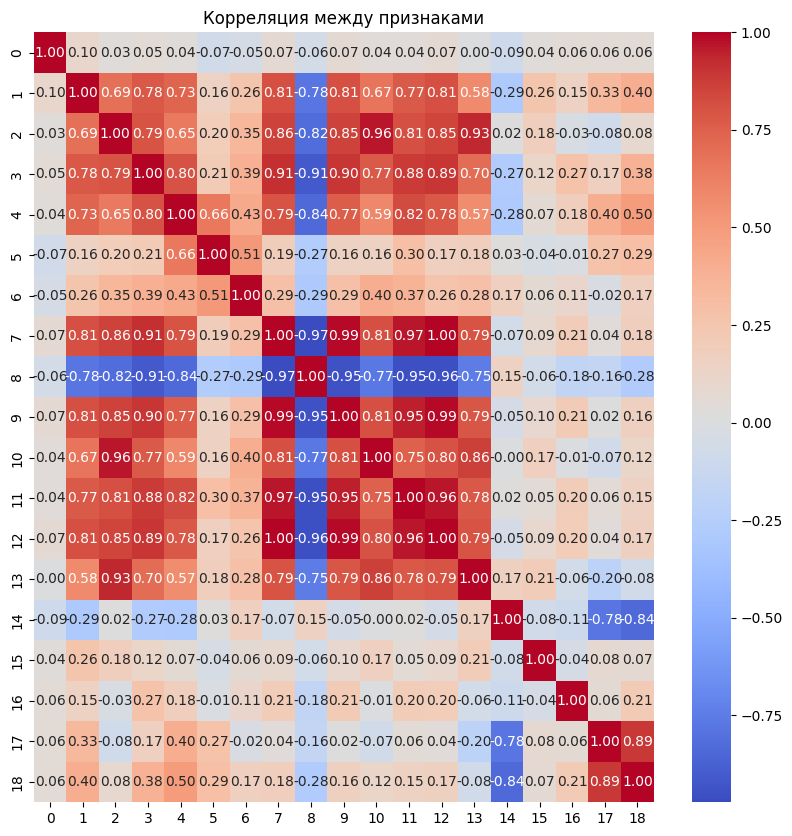

[0, 4, 6, 0, 0, 0, 8, 0, 8, 2, 6, 8, 2, 0, 0, 0, 2, 2]
0 0
1 4
2 6
3 0
4 0
5 0
6 8
7 0
8 8
9 2
10 6
11 8
12 2
13 0
14 0
15 0
16 2
17 2
[2, 3, 7, 9, 10, 11, 12, 13, 17, 18]


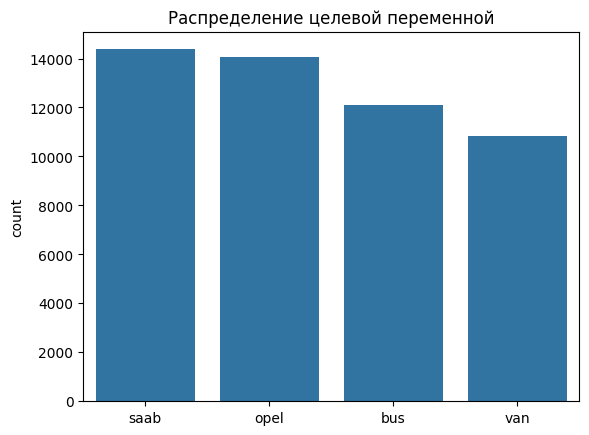

In [58]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
# проверка на пропуски
print(X_train_pd.isna().sum())

#матрица корреляции признаков

correlation_matrix = X_train_pd.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

threshold = 0.89
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs >= threshold) & (corr_pairs < 1.0)]

count = [0 for i in range(18)]
result = []
for pair in high_corr_pairs.index:
  count[pair[0]-1] +=1
  count[pair[1]-1] +=1
print(count)

for i in range(18):
  print(i, count[i])
  if count[i] > 0:
    result.append(i+1)
print(result) #список коррелирующих признаков при значении threshold=0.9

#for pair in high_corr_pairs.index:
#   print(pair)

X_train_pd.drop(columns=[2, 3, 4, 9, 10, 11, 12, 13, 18], inplace = True)
X_test_pd.drop(columns=[2, 3, 4, 9, 10, 11, 12, 13, 18], inplace = True)

# StandartScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(X_train_pd)
test_data = scaler.fit_transform(X_test_pd)

train_data.shape

#распределение целевой переменной

sns.countplot(x=y_train, data=X_train_pd)
plt.title('Распределение целевой переменной')
plt.show()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [60]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(train_data, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
y_pred = best_model.predict(train_data)
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='weighted')

print(f'accuracy score = {round(accuracy, 3)}')
print(f'f1_score = {round(f1, 3)}')

{'C': 10, 'penalty': 'l1'}
accuracy score = 0.698
f1_score = 0.694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [61]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

#%pip install scipy==1.11.4
#%pip install scikit-plot

y_proba = best_model.predict_proba(test_data)

scikitplot.metrics.plot_roc(y_test, y_proba)
plt.title('ROC-кривая')
plt.show()

NameError: name 'scikitplot' is not defined

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

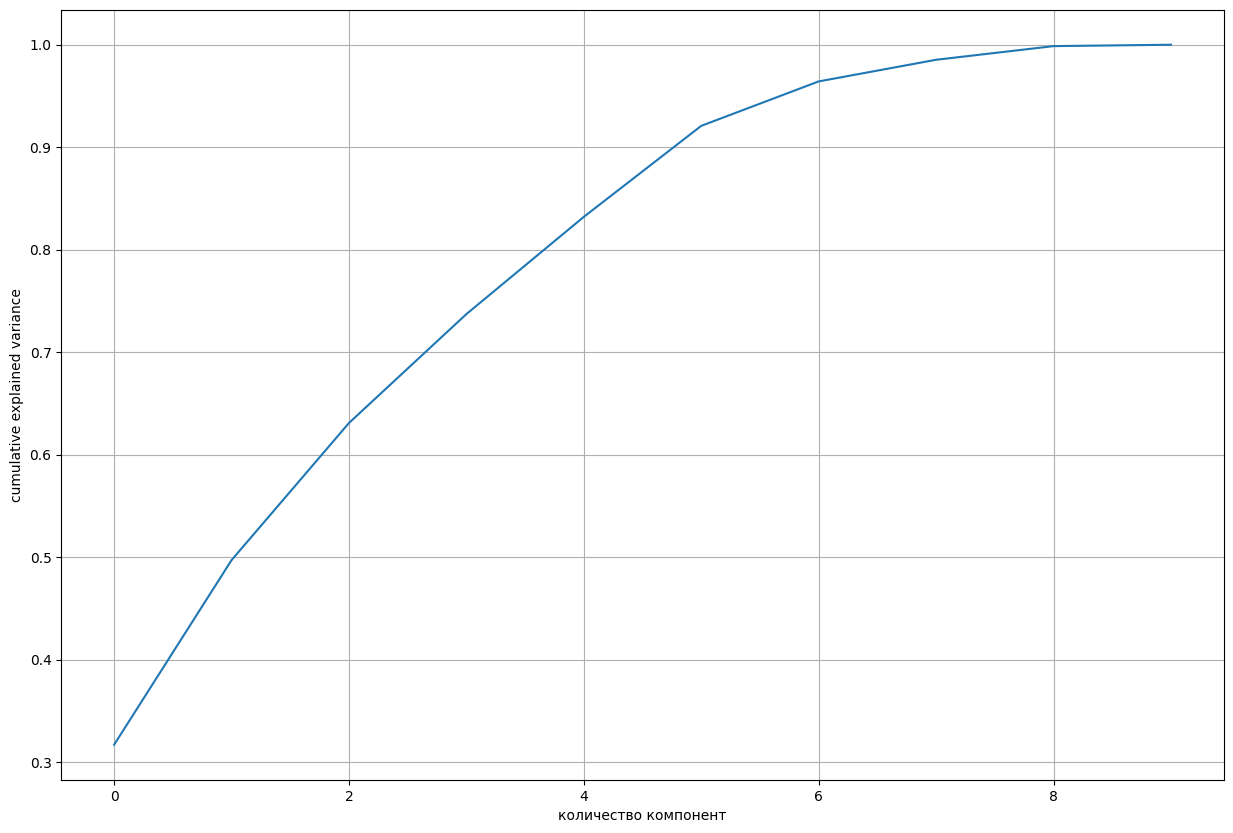

In [62]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_data)

plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('количество компонент')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Нам нужно 8 компонент, т.к. они обеспечивают почти 100% данных о признаках.

In [63]:
### YOUR CODE HERE
pca_transformation = PCA(n_components=8)
pca_transformation_X_train = pca_transformation.fit_transform(X_train)
pca_transformation_X_test = pca_transformation.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [64]:
### YOUR CODE HERE
logreg_pca_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(logreg_pca_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(pca_transformation_X_train, y_train)

best_params = grid_search.best_params_
logreg_pca_best_model = grid_search.best_estimator_

y_pred = logreg_pca_best_model.predict(pca_transformation_X_train)

accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='weighted')

print(f'accuracy score = {round(accuracy, 3)}')
print(f'f1_score = {round(f1, 3)}')

accuracy score = 0.592
f1_score = 0.572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(train_data, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_f1_score = grid_search.best_score_

print(f"Оптимальное значение max_depth: {best_max_depth}")
print(f"Лучший F1  после cross-validation: {best_f1_score}")

tree_best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
tree_best_model.fit(train_data, y_train)

y_pred = tree_best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"accuracy score = {round(accuracy, 3)}")
print(f"f1_score = {round(f1, 3)}")

Оптимальное значение max_depth: 11
Лучший F1  после cross-validation: 0.6874038204932053
accuracy score = 0.687
f1_score = 0.694


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


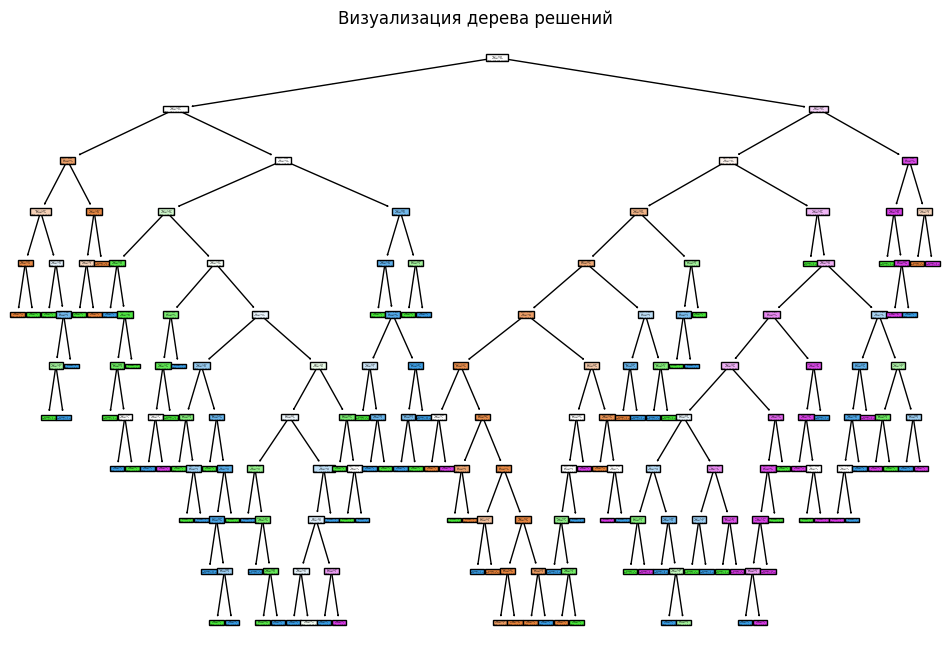

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(tree_best_model, filled=True)
plt.title('Визуализация дерева решений')
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [67]:
from sklearn.datasets import make_classification
from sklearn.utils import resample


X, y = make_classification(n_samples=846, n_features=19, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

N_min = 2
N_max = 100
step = 5

def bagging_ensemble(X_train, y_train, model_class, n_models):
    n_samples = len(X_train)
    models = []

    for _ in range(n_models):
        X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=n_samples)
        model = model_class()
        model.fit(X_bootstrap, y_bootstrap)
        models.append(model)

    return models

accuracy_scores_logreg = []
f1_scores_logreg = []
accuracy_scores_tree = []
f1_scores_tree = []

for N in range(N_min, N_max + 1, step):
    logreg_models = bagging_ensemble(X_train, y_train, LogisticRegression, N)
    logreg_predictions = np.mean([model.predict(X_test) for model in logreg_models], axis=0).round()

    accuracy_scores_logreg.append(accuracy_score(y_test, logreg_predictions))
    f1_scores_logreg.append(f1_score(y_test, logreg_predictions))

    tree_models = bagging_ensemble(X_train, y_train, DecisionTreeClassifier, N)
    tree_predictions = np.mean([model.predict(X_test) for model in tree_models], axis=0).round()

    accuracy_scores_tree.append(accuracy_score(y_test, tree_predictions))
    f1_scores_tree.append(f1_score(y_test, tree_predictions))


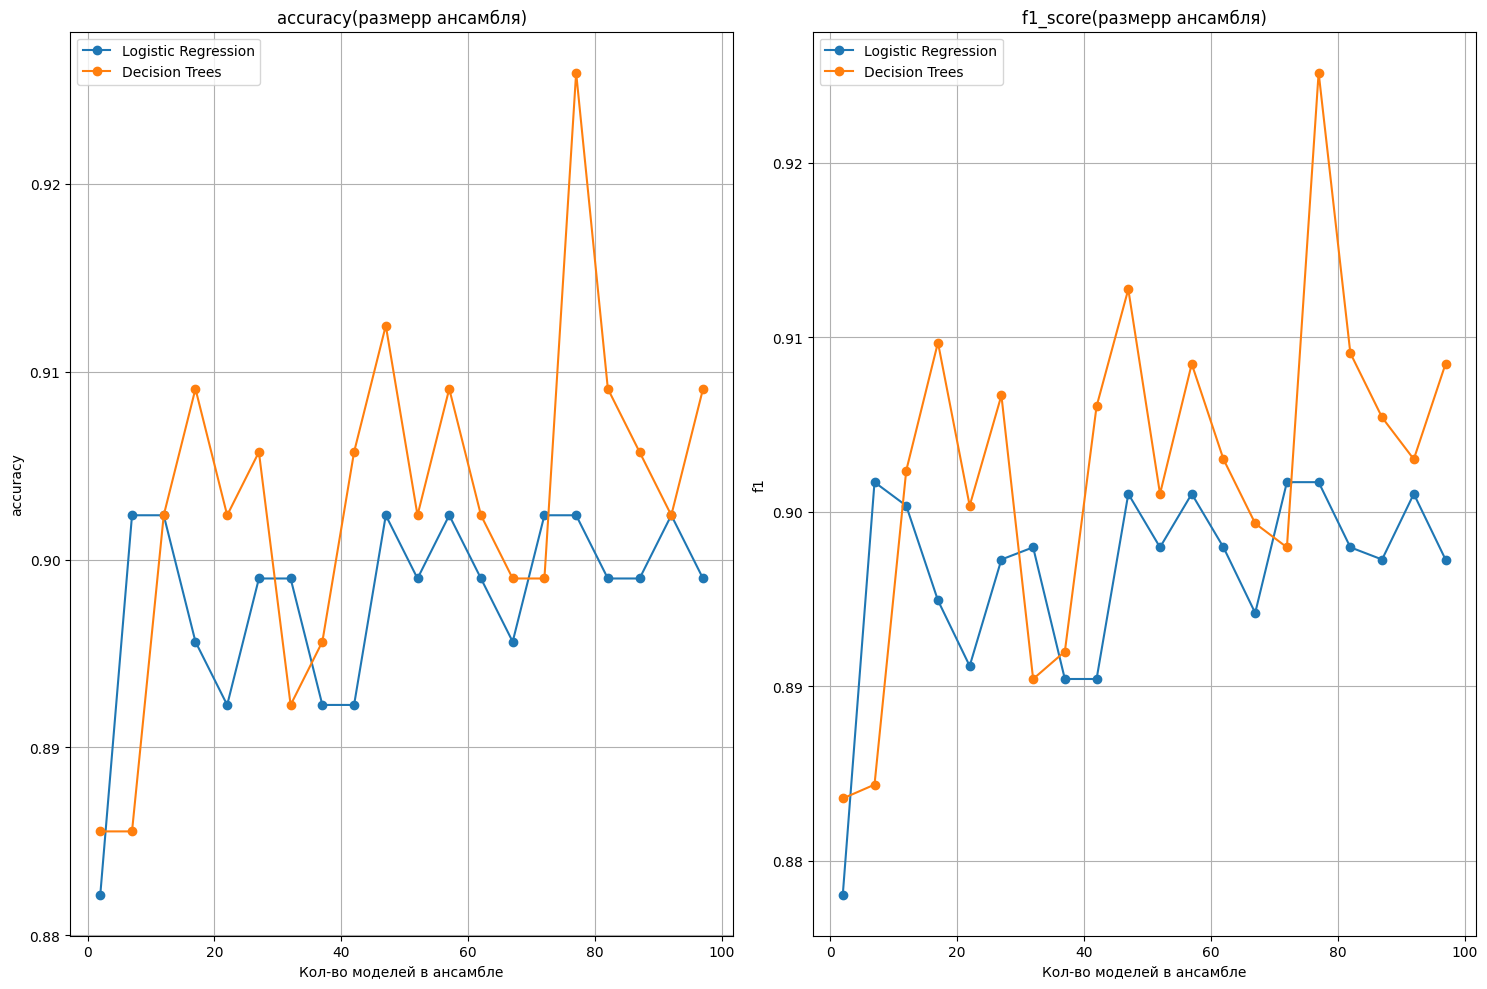

In [68]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(range(N_min, N_max + 1, step), accuracy_scores_logreg, label='Logistic Regression', marker='o')
plt.plot(range(N_min, N_max + 1, step), accuracy_scores_tree, label='Decision Trees', marker='o')
plt.title('accuracy(размерр ансамбля)')
plt.xlabel('Кол-во моделей в ансамбле')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(N_min, N_max + 1, step), f1_scores_logreg, label='Logistic Regression', marker='o')
plt.plot(range(N_min, N_max + 1, step), f1_scores_tree, label='Decision Trees', marker='o')
plt.title('f1_score(размерр ансамбля)')
plt.xlabel('Кол-во моделей в ансамбле')
plt.ylabel('f1')
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [69]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
def evaluate_random_forest(X_train, y_train, X_test, y_test, max_trees):
    n_trees = range(1, max_trees + 1)
    accuracy_scores = []
    f1_scores = []

    for n in n_trees:
        model = RandomForestClassifier(n_estimators=n, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    return n_trees, accuracy_scores, f1_scores

max_trees = 100
n_trees, accuracy_rf, f1_rf = evaluate_random_forest(X_train, y_train, X_test, y_test, max_trees)


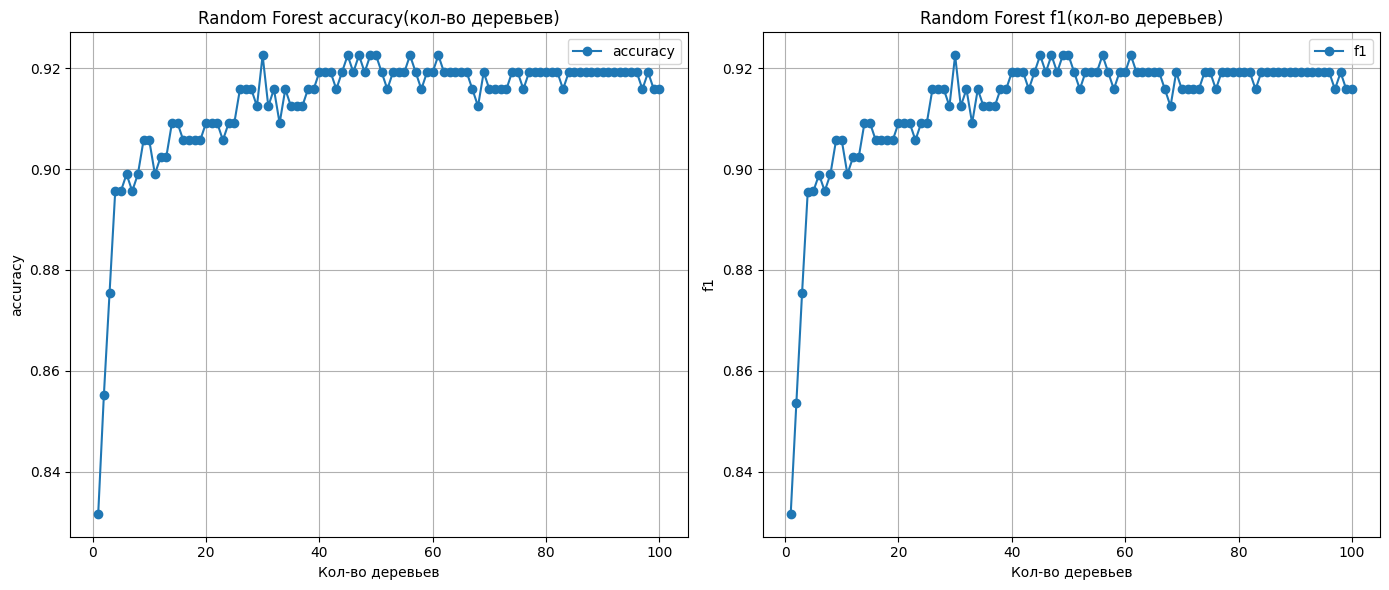

In [70]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees, accuracy_rf, label='accuracy', marker='o')
plt.title('Random Forest accuracy(кол-во деревьев)')
plt.xlabel('Кол-во деревьев')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

# График F1-меры
plt.subplot(1, 2, 2)
plt.plot(n_trees, f1_rf, label='f1', marker='o')
plt.title('Random Forest f1(кол-во деревьев)')
plt.xlabel('Кол-во деревьев')
plt.ylabel('f1')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [71]:
# YOUR CODE HERE
def learning_curve(X_train, y_train, X_test, y_test, model_class, model_params, n_parts):
    train_sizes = np.linspace(1, n_parts, n_parts, dtype=int)
    accuracy_scores = []
    f1_scores = []

    for size in train_sizes:
        X_train_subset = X_train[:size * (len(X_train) // n_parts)]
        y_train_subset = y_train[:size * (len(y_train) // n_parts)]

        model = model_class(**model_params)
        model.fit(X_train_subset, y_train_subset)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    return train_sizes, accuracy_scores, f1_scores

logistic_params = {'C': 0.1, 'penalty': 'l2'}
decision_tree_params = {'max_depth': 11}
random_forest_params = {'n_estimators': 20}

n_parts = 10

train_sizes_lr, accuracy_lr, f1_lr = learning_curve(X_train, y_train, X_test, y_test, LogisticRegression, logistic_params, n_parts)
train_sizes_dt, accuracy_dt, f1_dt = learning_curve(X_train, y_train, X_test, y_test, DecisionTreeClassifier, decision_tree_params, n_parts)
train_sizes_rf, accuracy_rf, f1_rf = learning_curve(X_train, y_train, X_test, y_test, RandomForestClassifier, random_forest_params, n_parts)


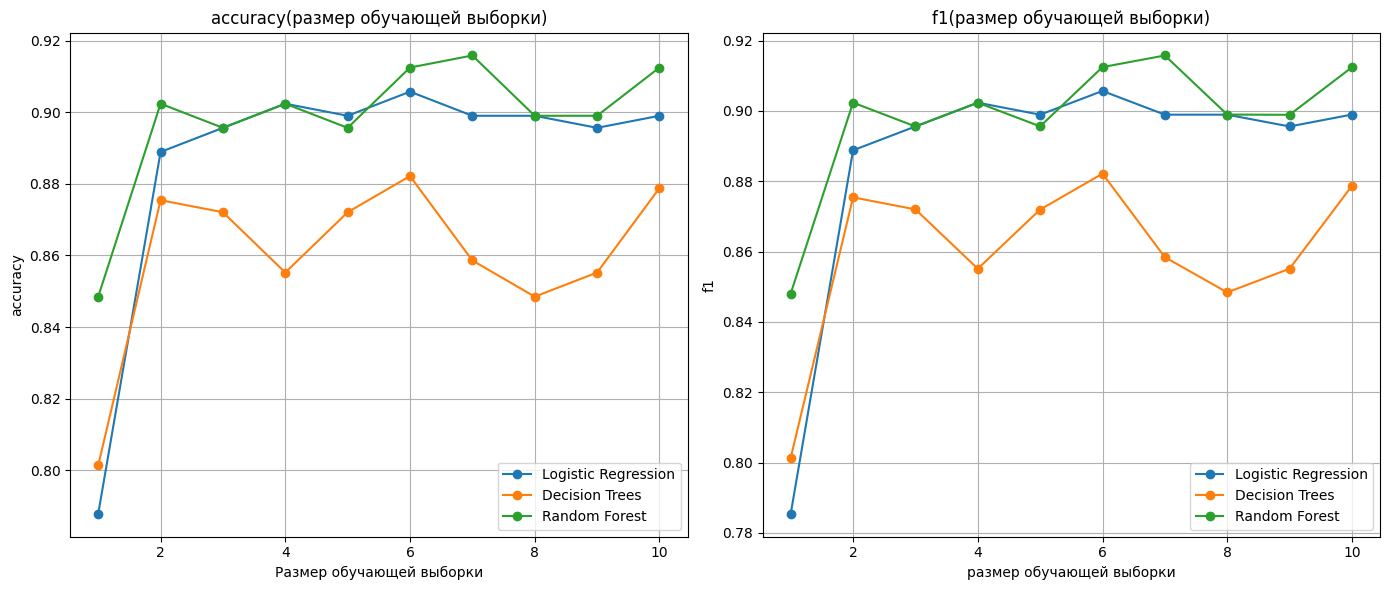

In [72]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_lr, accuracy_lr, label='Logistic Regression', marker='o')
plt.plot(train_sizes_dt, accuracy_dt, label='Decision Trees', marker='o')
plt.plot(train_sizes_rf, accuracy_rf, label='Random Forest', marker='o')
plt.title('accuracy(размер обучающей выборки)')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_sizes_lr, f1_lr, label='Logistic Regression', marker='o')
plt.plot(train_sizes_dt, f1_dt, label='Decision Trees', marker='o')
plt.plot(train_sizes_rf, f1_rf, label='Random Forest', marker='o')
plt.title('f1(размер обучающей выборки)')
plt.xlabel('размер обучающей выборки')
plt.ylabel('f1')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

При увеличении размера выборки увеличиваются значения метрик. Таким образом можно сделать вывод, что увеличение размера данных никак не влияет на метрики.